In [215]:
#for normalization technique
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv('wine_data.csv' , header=None, usecols=[0,1,2])
df.columns = ['class label', 'Alchol', 'Malic Acid']
df

,class label,Alchol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alchol', ylabel='Density'>

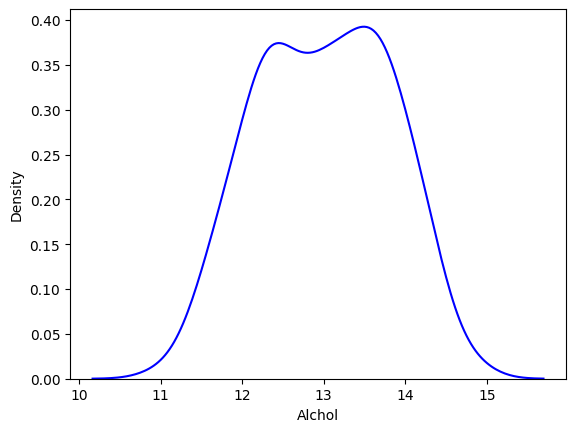

In [217]:
sns.kdeplot(df['Alchol'], label='Alchol', color='blue')

<Axes: xlabel='Malic Acid', ylabel='Density'>

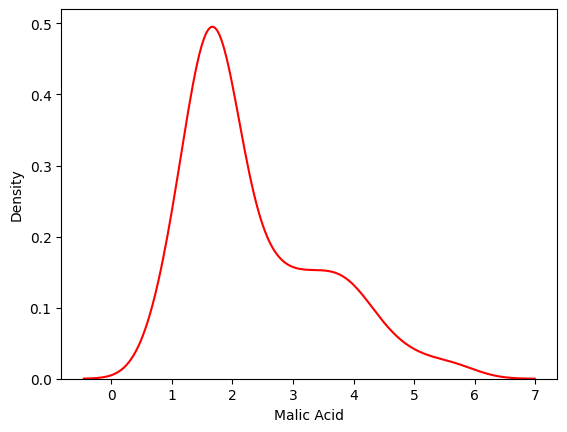

In [218]:
sns.kdeplot(df['Malic Acid'], label='Malic Acid', color='red')

In [219]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('class label', axis=1)
y = df['class label']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Check shapes
print(x_train.shape, x_test.shape)


(124, 2) (54, 2)


In [220]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

np.round(x_train.describe(),1)

,Alchol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [221]:
np.round(x_train_scaled.describe(),1)

,Alchol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


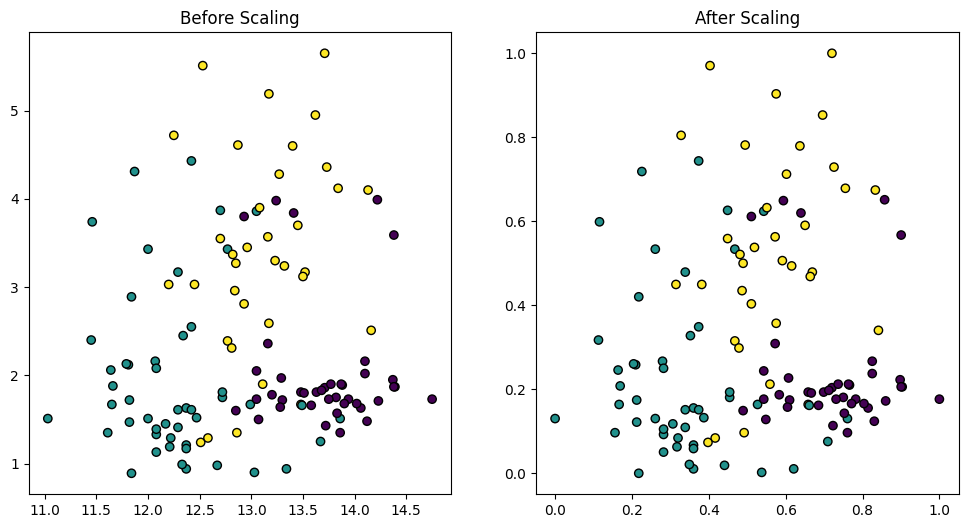

In [222]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(x_train['Alchol'], x_train['Malic Acid'], c=y_train, cmap='viridis', edgecolor='k')
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Alchol'], x_train_scaled['Malic Acid'], c=y_train, cmap='viridis', edgecolor='k')
ax2.set_title('After Scaling')
plt.show()